## OSR test for case 1a - m3/h + outdoor temperature

>   ### model performance is similar to Model 001. The inclusion of outdoor temperature does not increase the model performance above the effect of the m3/h in Model 001 and Modell 003.

apparently the outdoor temperature does not fit the MW usage. Potentially the outdoor temperature is not meditaing the MW controls. More analysis is necessary. It is as if the MW consumption controls are not directly affected by the external tempreature

>>#### Test RMSE: 0.064
>>#### Test MAPE: inf
>>#### Test SMAPE: 3.393
>>#### Correlation: 0.986
>>#### R-squared: 0.972

>   #### target feature:            MW (thermic) 
>   #### exogenous feature:         m3/h + OUT_TEMP (outdoor temperature) 
>   ### statistical esimator:       SARIMAX - Seasonal Auto-Regressive Integrated Moving Average
   


> RENergetic Project: fitting a forcasting estimator to predict MW over time and use of m3/h + outdoor temperature as exo feature

>This model is based on model proptotyping run in IBM Modeler 18.2 software at 09/05/21

> Dataframe from: XXX building complex 
>   ### time window covered: 15-Aug-2020 -> 09 Nov 2020

>Other buildings in OXXX and dataframes available - contact DR D. Baranzini)

>> Coding by Dr Daniele Baranzini



In [54]:
# method to check working directory
import os
CURR_DIR = os.getcwd()
print(CURR_DIR)

C:\Users\DANIELE\Anaconda3\envs\RENergectic_Forecasting_Models_


In [55]:
%matplotlib inline

In [56]:
import numpy as np
import pandas as pd
#from scipy.stats import norm
import matplotlib.pyplot as plt
#from datetime import datetime                             # maybe necessary for future actions on dates and indexing
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX     # toy-model for SARIMAX estimator
#from random import random
import openpyxl

In [57]:
# read data and encode timestamp as index
df_base = pd.read_excel('Summer_Period_Dibit2_V04_REPLICA.xlsx')
df_base.index = df_base['timestamp']
#df_base

ts1 = df_base[['m3_h_orig_orig','OUT_TEMP', 'MW']]          #timestamp column is dropped as it is doubled with index 
endog = ts1['MW']
exog = ts1[['m3_h_orig_orig','OUT_TEMP']]
ts1

,m3_h_orig_orig,OUT_TEMP,MW
timestamp,,,
2020-08-15 00:00:00,59.8,24.0,0.94
2020-08-15 01:00:00,59.8,22.9,0.94
2020-08-15 02:00:00,64.6,21.5,1.07
2020-08-15 03:00:00,56.2,21.9,0.91
2020-08-15 04:00:00,64.6,21.5,0.99
...,...,...,...
2020-11-09 19:00:00,103.3,11.6,1.76
2020-11-09 20:00:00,103.6,10.6,1.76
2020-11-09 21:00:00,104.8,9.8,1.91


### In-Sample fitting 

In [58]:
# fit the complete model
model = SARIMAX(endog, exog, order=(0,1,7), seasonal_order=(1,0,1,24))
fit_res = model.fit(disp=False, maxiter=250)
print(fit_res.summary())


C:\Users\DANIELE\Anaconda3\envs\RENergectic_Forecasting_Models_\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\DANIELE\Anaconda3\envs\RENergectic_Forecasting_Models_\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                   MW   No. Observations:                 2088
Model:             SARIMAX(0, 1, 7)x(1, 0, [1], 24)   Log Likelihood                2785.463
Date:                              Mon, 10 May 2021   AIC                          -5546.926
Time:                                      07:28:44   BIC                          -5479.205
Sample:                                  08-15-2020   HQIC                         -5522.114
                                       - 11-09-2020                                         
Covariance Type:                                opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
m3_h_orig_orig     0.0132   8.71e-05    150.982      0.000       0.013       0.013
OUT_TEM

In [59]:
# In-sample forecast (baseline approach, no train test split for backtesting)
yhat = fit_res.predict(start=0, end=2087, exog=exog)        # example of In-sample forecast with exo 
yhat                                                        # predict() can do In- or Out-of-sample forecast

2020-08-15 00:00:00    0.647994
2020-08-15 01:00:00    0.946345
2020-08-15 02:00:00    1.013696
2020-08-15 03:00:00    0.930443
2020-08-15 04:00:00    1.030674
                         ...   
2020-11-09 19:00:00    1.818182
2020-11-09 20:00:00    1.770866
2020-11-09 21:00:00    1.808791
2020-11-09 22:00:00    1.877316
2020-11-09 23:00:00    2.074212
Freq: H, Name: predicted_mean, Length: 2088, dtype: float64

In [60]:
ts1['Forecast_SARIMAX']=yhat   # appending forecast values to ts1 dataframe
ts1

C:\Users\DANIELE\Anaconda3\envs\RENergectic_Forecasting_Models_\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,m3_h_orig_orig,OUT_TEMP,MW,Forecast_SARIMAX
timestamp,,,,
2020-08-15 00:00:00,59.8,24.0,0.94,0.647994
2020-08-15 01:00:00,59.8,22.9,0.94,0.946345
2020-08-15 02:00:00,64.6,21.5,1.07,1.013696
2020-08-15 03:00:00,56.2,21.9,0.91,0.930443
2020-08-15 04:00:00,64.6,21.5,0.99,1.030674
...,...,...,...,...
2020-11-09 19:00:00,103.3,11.6,1.76,1.818182
2020-11-09 20:00:00,103.6,10.6,1.76,1.770866
2020-11-09 21:00:00,104.8,9.8,1.91,1.808791


Test RMSE: 0.064
Test MAPE: inf
Test SMAPE: 3.393
Correlation: 0.986
R-squared: 0.972


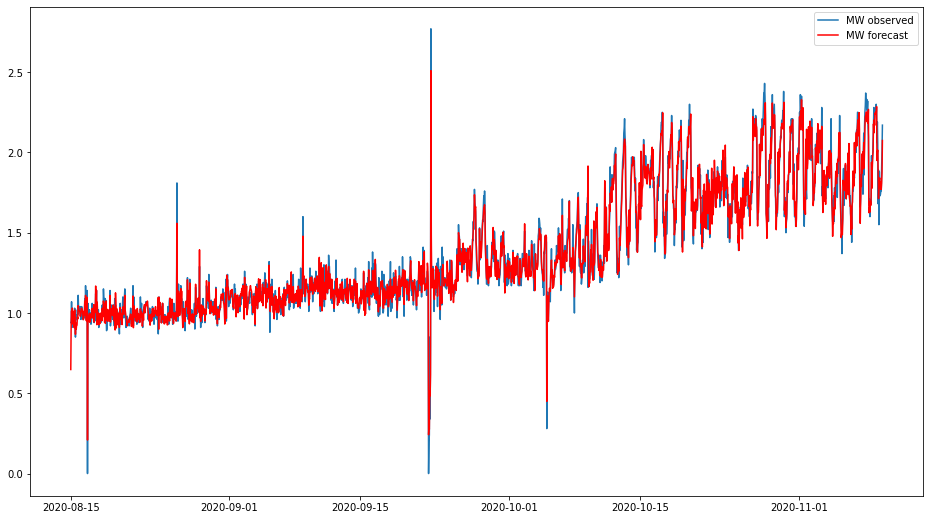

In [65]:
# evaluate generalization performance of SARIMAX model above (In-sample forecast)
obs=ts1['MW']
pred=ts1['Forecast_SARIMAX']

# RMSE
rmse = sqrt(mean_squared_error(obs, pred))                                                # algo for RMSE
print('Test RMSE: %.3f' % rmse)

# MAPE - from 'https://vedexcel.com/how-to-calculate-mape-in-python/'
def mape(obs, pred):
    return np.mean(np.abs((obs - pred) / (obs)))*100                                      # algo for MAPE
result = mape(obs, pred)                                                  
print('Test MAPE: %.3f' % result)                            

#SMAPE - from  'https://vedexcel.com/how-to-calculate-smape-in-python/'
def smape(obs, pred):
    return 100/len(obs) * np.sum(2 * np.abs(pred - obs) / (np.abs(obs) + np.abs(pred)))   # algo for SMAPE

result = smape(obs,pred)
print('Test SMAPE: %.3f' % result)

# Pearson Correlation
corr = np.corrcoef(obs, pred)[0,1]
print('Correlation: %.3f' % corr)

# R2 
r2_result = corr**2                                                                       # algo for R-squared
print('R-squared: %.3f' % r2_result)


# plot forecasts against actual outcomes

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
plt.plot(obs, label = 'MW observed')
plt.plot(pred, color='red', label = 'MW forecast')
plt.legend()
plt.show()

In [66]:
# end